# **Advanced Analytics on UAE Auto Sales & Predictive Machine Learning Model for Price Prediction**

## **Description of Data**

This dataset offers a comprehensive snapshot of current vehicle sales across the United Arab Emirates, providing valuable insights into automotive market trends and consumer preferences.

**Data Columns and Descriptions**

**1. Price:** The asking price of each vehicle.

**2. Brand:** Manufacturer of the vehicle.

**3. Model:** Specific model of the vehicle.

**4. Trim:** Trim level of the vehicle, indicating different features or packages.

**5. Kilometers:** Mileage of the vehicle, indicating how much it has been used.

**6. Year:** Year of manufacture.

**7. Vehicle Age Years:** The age of the vehicle calculated from the current year.

**8. Regional Specs:** Specifications tailored to the GCC or other regions.

**9. Doors:** Number of doors in the vehicle.

**10. Body Type:** Type of vehicle body (e.g., SUV, hatchback).

**11. Fuel Type:** Type of fuel the vehicle uses (e.g., petrol, diesel).

**12. Seating Capacity:** Number of seats in the vehicle.

**13. Transmission Type:** Manual or automatic transmission.

**14. Engine Capacity CC:** Engine size in cubic centimeters.

**15. Horsepower:** Power output of the vehicle's engine.

**16. No of Cylinders:** Number of engine cylinders.

**17. Exterior Color:** Color of the vehicle's exterior.

**18. Interior Color:** Color of the vehicle's interior.

**20. Warranty:** Indicates if the vehicle comes with a warranty.

**21. Address/Country/City/Area Name/Location
Name:** Detailed location information where the vehicle is sold.

**22. Latitude/Longitude:** Geographical coordinates of the listed vehicle.

**23. Seller Type:** Indicates if the seller is a dealership or a private individual.


**To Develop or To Perform:**

1. **Market Trend Analysis** - Advanced Exploratory Data Analytics
2. **Predictive Analysis** - To develop a ML Model to predict Car Price based on several different parameters
3. **Comparitve Studies between Brands and Models**

**Importing Libraries**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Data**

In [ ]:
#Loading the dataset
raw_data_set = pd.read_csv('/content/drive/MyDrive/Projects/UAE_AutoMarket_Analysis/dubizzle_cars_dataset.csv')

## **Data Comprehension**

In [ ]:
#Printing sample first five rows
raw_data_set.head()

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,3,GCC Specs,4,Pick Up Truck,...,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,4,GCC Specs,5,SUV,...,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Deira,Abu Hail,25.275416,55.346450,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,5,GCC Specs,5,SUV,...,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,Veloce,49193,2021,3,GCC Specs,4,Hatchback,...,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,GL,30,2024,0,GCC Specs,5,SUV,...,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned


In [ ]:
#Checking the no of rows & columns of the data
raw_data_set.shape

(9953, 27)

In [ ]:
#Checking the info of data
raw_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               9953 non-null   int64  
 1   brand               9953 non-null   object 
 2   model               9953 non-null   object 
 3   trim                9941 non-null   object 
 4   kilometers          9953 non-null   int64  
 5   year                9953 non-null   int64  
 6   vehicle_age_years   9953 non-null   int64  
 7   regional_specs      9953 non-null   object 
 8   doors               9953 non-null   int64  
 9   body_type           9953 non-null   object 
 10  fuel_type           9953 non-null   object 
 11  seating_capacity    9953 non-null   int64  
 12  transmission_type   9953 non-null   object 
 13  engine_capacity_cc  7992 non-null   object 
 14  horsepower          9495 non-null   object 
 15  no_of_cylinders     9953 non-null   int64  
 16  exteri

In [ ]:
#Checking the unique values in Horsepower
raw_data_set['horsepower'].unique()

array(['300 - 399 HP', '500 - 599 HP', '200 - 299 HP', '400 - 499 HP',
       '100 - 199 HP', nan, '600 - 699 HP', '900+ HP', '700 - 799 HP',
       'Unknown', '800 - 899 HP', '0 - 99 HP'], dtype=object)

In [ ]:
raw_data_set['horsepower'].value_counts()

horsepower
200 - 299 HP    2470
300 - 399 HP    1846
100 - 199 HP    1730
400 - 499 HP    1120
500 - 599 HP     891
Unknown          632
600 - 699 HP     449
700 - 799 HP     158
0 - 99 HP         76
900+ HP           63
800 - 899 HP      60
Name: count, dtype: int64

In [ ]:
raw_data_set['horsepower'].isna().sum()

458

In [ ]:
nan_rows = raw_data_set[raw_data_set.isna().any(axis=1)]
pd.set_option('display.max_columns', None)

nan_rows

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,seating_capacity,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
7,139900,Volkswagen,Teramont,Trendline,20450,2022,2,GCC Specs,5,SUV,Petrol,7,Automatic Transmission,3500 - 3999 cc,300 - 399 HP,4,White,Black,Yes,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,NaN,25.078641,55.135252,Dealership/Certified Pre-Owned
8,359900,Alfa Romeo,Giulia,Quadrifoglio,100,2022,2,GCC Specs,4,Sedan,Petrol,4,Automatic Transmission,2500 - 2999 cc,500 - 599 HP,6,Blue,Black,Yes,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,NaN,25.078641,55.135252,Dealership/Certified Pre-Owned
11,199900,Alfa Romeo,Giulia,Veloce,21287,2022,2,GCC Specs,4,Sedan,Petrol,5,Automatic Transmission,2000 - 2499 cc,300 - 399 HP,4,Red,Black,Yes,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,NaN,25.078641,55.135252,Dealership/Certified Pre-Owned
12,374900,Alfa Romeo,Stelvio,Quadrifoglio,10906,2023,1,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,NaN,NaN,6,Blue,Unknown,Yes,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,NaN,25.078641,55.135252,Dealership/Certified Pre-Owned
16,129900,BMW,7-Series,730i Exclusive,109000,2017,7,GCC Specs,4,Sedan,Petrol,5,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,White,Tan,No,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,NaN,25.078641,55.135252,Dealership/Certified Pre-Owned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,115000,Lexus,LX570,Platinum,225000,2013,11,GCC Specs,4,SUV,Petrol,0,Automatic Transmission,NaN,Unknown,8,Black,Beige,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9948,215000,Lexus,LX570,Platinum,191000,2016,8,GCC Specs,4,SUV,Petrol,0,Automatic Transmission,NaN,Unknown,8,White,Beige,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9950,173000,Toyota,Land Cruiser,GXR,134000,2018,6,GCC Specs,4,SUV,Petrol,7,Automatic Transmission,NaN,Unknown,6,Black,Beige,Yes,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9951,63000,Toyota,Prado,Tx-l MID,290000,2011,13,GCC Specs,5,SUV,Petrol,7,Automatic Transmission,NaN,Unknown,6,White,Beige,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer


In [ ]:
raw_data_set['brand'].unique()

array(['Dodge', 'Alfa Romeo', 'Audi', 'GAC', 'Land Rover', 'Hyundai',
       'Volkswagen', 'Volvo', 'Toyota', 'BMW', 'Nissan', 'Infiniti',
       'Porsche', 'Rolls-Royce', 'Mercedes-Benz', 'Ford', 'MINI', 'MG',
       'Lexus', 'BAIC', 'Ferrari', 'Tesla', 'Mazda', 'Honda', 'Bentley',
       'Lamborghini', 'Jeep', 'McLaren', 'Chevrolet', 'Jetour',
       'Mercedes-Maybach', 'Cadillac', 'Daihatsu', 'SsangYong', 'Iveco',
       'Mitsubishi', 'Kia', 'Jaguar', 'Lincoln', 'Maserati',
       'Mercedes-AMG', 'Aston Martin', 'RAM', 'Daewoo', 'Suzuki', 'Haval',
       'Genesis', 'Fiat', 'GMC', 'Great Wall', 'Avatr', 'Opel', 'Peugeot',
       'Hongqi', 'Subaru', 'Changan', 'Renault', 'JAC', 'Chery',
       'Maybach', 'TANK', 'Isuzu', 'Smart', 'Skoda', 'Lotus', 'Abarth',
       'Chrysler', 'UAZ', 'KTM', 'Rabdan', 'Bufori', 'Geely', 'INEOS',
       'Bestune', 'Fisker', 'BMW Alpina', 'Maxus', 'Bugatti', 'Acura',
       'Pagani', 'Borgward', 'Soueast', 'Mercury', 'Rivian', 'Hummer',
       'King Long'

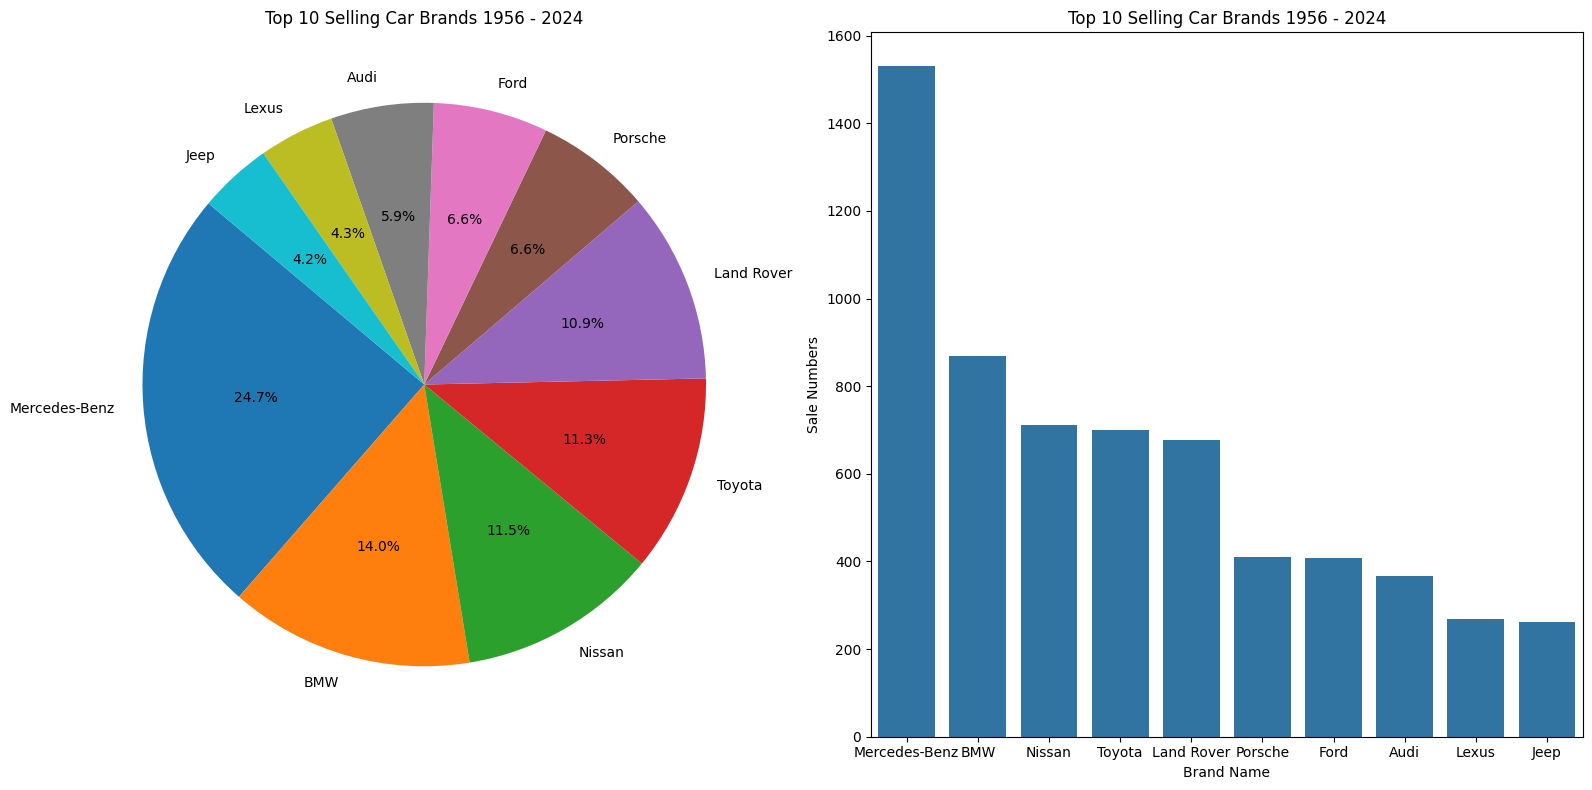

In [ ]:
brand_vc = raw_data_set['brand'].value_counts()
brand_top10 = brand_vc.head(10)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Adjust the space between the plots
fig.tight_layout(pad=5.0)

# Pie chart for top 10 car brands

axes[0].pie(brand_top10, labels=brand_top10.index,autopct='%1.1f%%', startangle=140)
axes[0].set_title('Top 10 Selling Car Brands 1956 - 2024')

# Bar plot for top 10 car brands
sns.barplot(x= brand_top10.index , y= brand_top10.values, ax=axes[1])
axes[1].set_title('Top 10 Selling Car Brands 1956 - 2024')
axes[1].set_xlabel('Brand Name')
axes[1].set_ylabel('Sale Numbers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

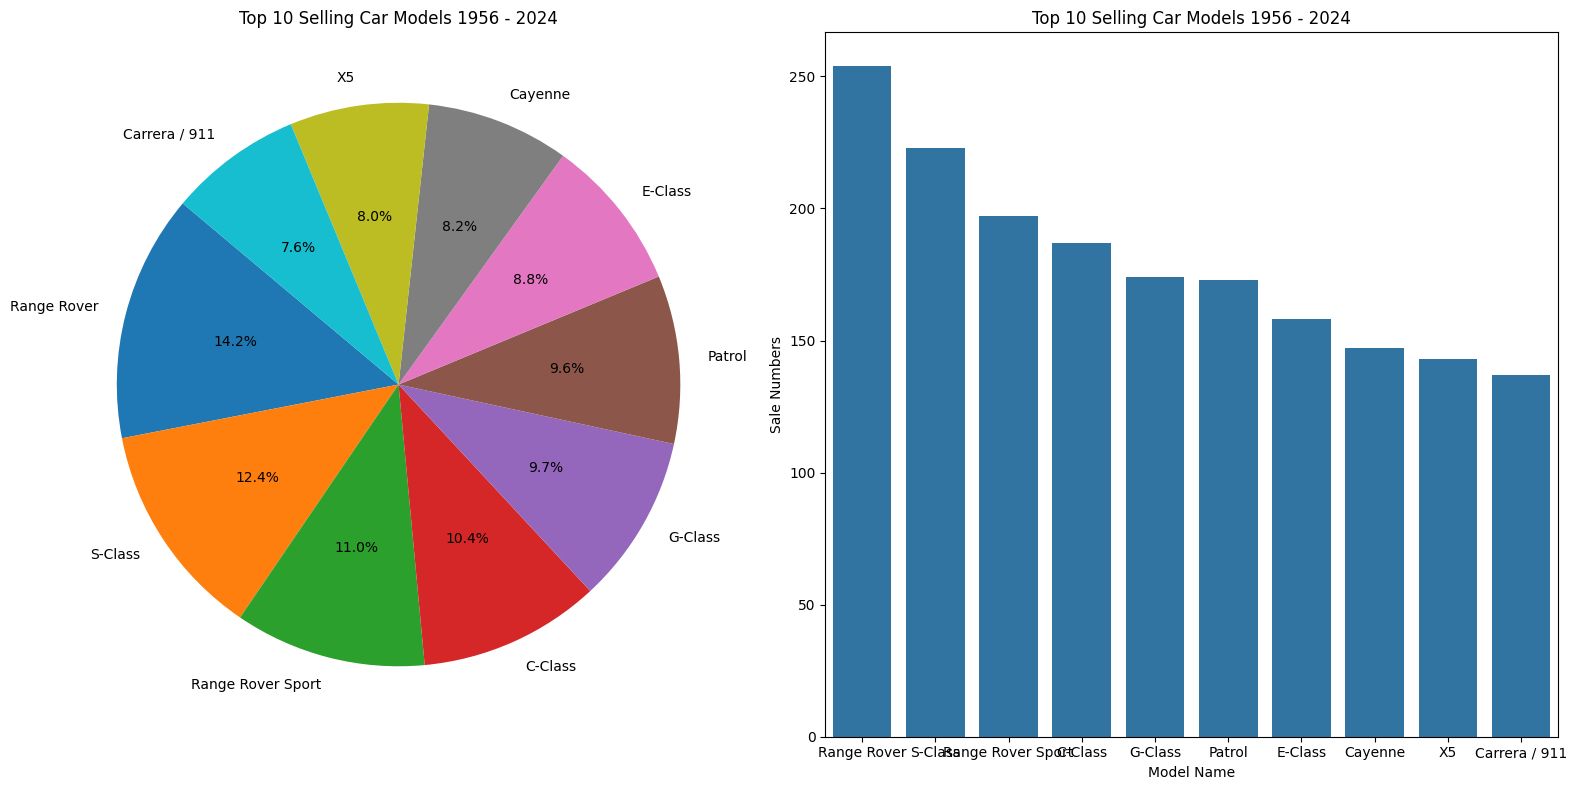

In [ ]:
model_vc = raw_data_set['model'].value_counts()
model_top10 = model_vc.head(10)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Adjust the space between the plots
fig.tight_layout(pad=5.0)

# Pie chart for top 10 car models

axes[0].pie(model_top10, labels=model_top10.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Top 10 Selling Car Models 1956 - 2024')

# Bar plot for top 10 car models
sns.barplot(x= model_top10.index , y= model_top10.values, ax=axes[1])
axes[1].set_title('Top 10 Selling Car Models 1956 - 2024')
axes[1].set_xlabel('Model Name')
axes[1].set_ylabel('Sale Numbers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
raw_data_set['year'].describe()

count    9953.000000
mean     2018.118155
std         5.163806
min      1956.000000
25%      2016.000000
50%      2019.000000
75%      2022.000000
max      2024.000000
Name: year, dtype: float64

<Axes: xlabel='year'>

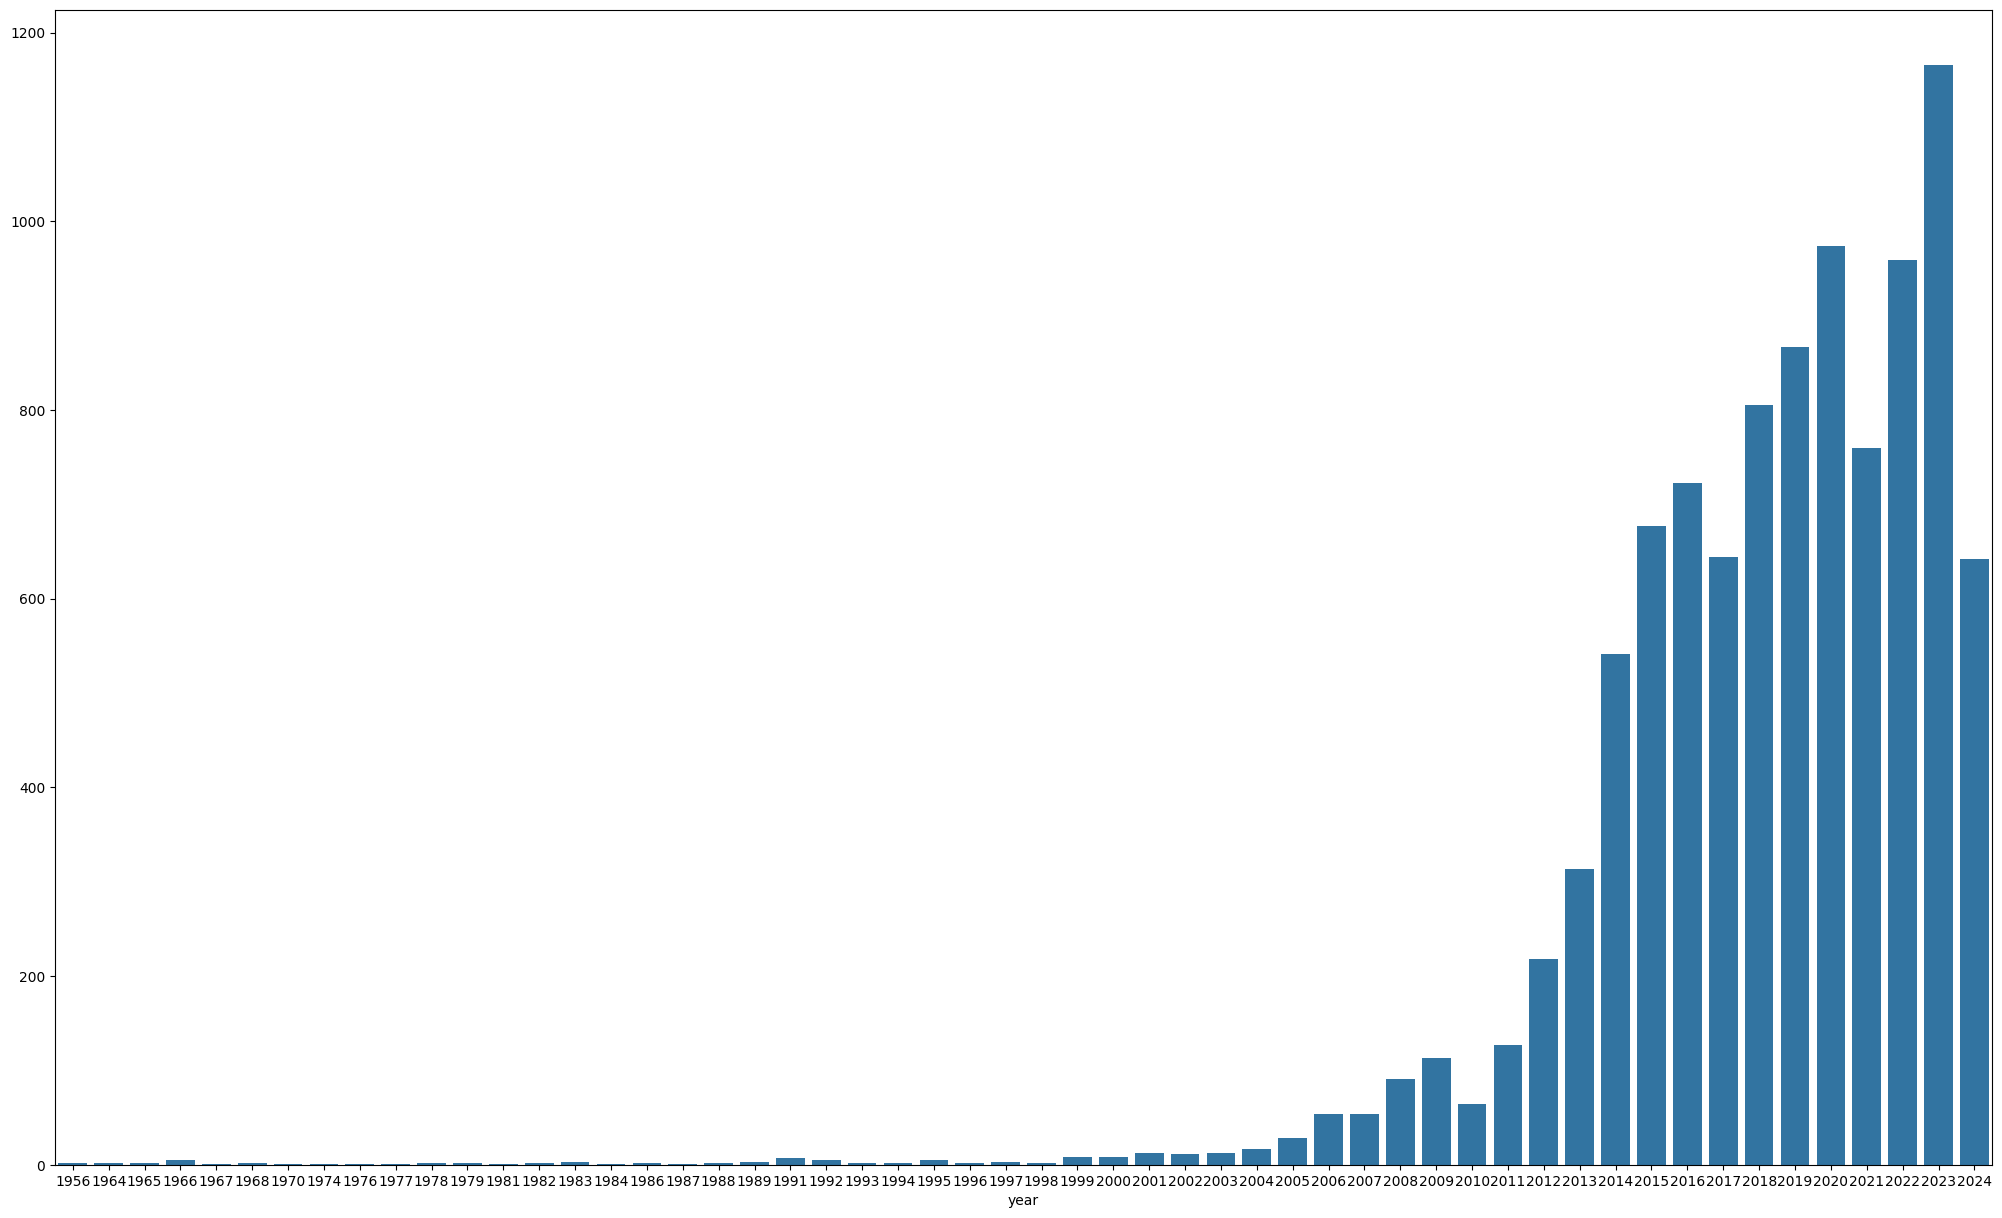

In [ ]:
# Bar plot for sales by year
sales_per_year = raw_data_set['year'].value_counts()
plt.figure(figsize=(25, 15))
sns.barplot(x= sales_per_year.index , y= sales_per_year.values)

**We can see from the above barplot that there is very less number of data from 1956 - 2005**

Hence it's adivisable to remove this data and focus more on recent data.

**Here are key reasons why:**

1. Market Dynamics:

    a. Used Car market evolves over time.

    b. Consumer Preferences change.

    c. Market conditions change from many decades ago.

    d. Earlier not as many people were buying cars as compared to now.

2. Technolgoical Changes:

   a. Cars from earlier decades have significantly different features, technology and depreciation rates compared to modern vehicles.

   b. This discrepancy can introduce noise into the analysis or model.

3. Regulatory Changes:

  a. Emission Standards

  b. Safety Regulations

  c. Governoment Policies


**Hence for the above reasons and understanding from the data, we are analysing data from last 15 years - 2009 -2024**

## **Data Cleaning**

### **Filtering Data from 2009 - 2024**

In [ ]:
#Loading data from only 2009
Auto_Sales_Data = raw_data_set[raw_data_set['year'] >= 2009]

In [ ]:
#Viewing the first five rows of the data
Auto_Sales_Data.head()

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,seating_capacity,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,3,GCC Specs,4,Pick Up Truck,Petrol,5,Automatic Transmission,4000+ cc,300 - 399 HP,8,White,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,4,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,2500 - 2999 cc,500 - 599 HP,6,Red,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Deira,Abu Hail,25.275416,55.346450,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,5,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,Green,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,Veloce,49193,2021,3,GCC Specs,4,Hatchback,Petrol,5,Automatic Transmission,1500 - 1999 cc,200 - 299 HP,4,Grey,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,GL,30,2024,0,GCC Specs,5,SUV,Petrol,7,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,Silver,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned


In [ ]:
#Checking the number of rows in the filtered dataset
Auto_Sales_Data.shape

(9593, 27)

In [ ]:
Auto_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9593 entries, 0 to 9952
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               9593 non-null   int64  
 1   brand               9593 non-null   object 
 2   model               9593 non-null   object 
 3   trim                9581 non-null   object 
 4   kilometers          9593 non-null   int64  
 5   year                9593 non-null   int64  
 6   vehicle_age_years   9593 non-null   int64  
 7   regional_specs      9593 non-null   object 
 8   doors               9593 non-null   int64  
 9   body_type           9593 non-null   object 
 10  fuel_type           9593 non-null   object 
 11  seating_capacity    9593 non-null   int64  
 12  transmission_type   9593 non-null   object 
 13  engine_capacity_cc  7719 non-null   object 
 14  horsepower          9151 non-null   object 
 15  no_of_cylinders     9593 non-null   int64  
 16  exterior_co

### **Null Value Treatment:**

In [ ]:
#Checking the null values in this dataset
Auto_Sales_Data.isna().sum()

price                    0
brand                    0
model                    0
trim                    12
kilometers               0
year                     0
vehicle_age_years        0
regional_specs           0
doors                    0
body_type                0
fuel_type                0
seating_capacity         0
transmission_type        0
engine_capacity_cc    1874
horsepower             442
no_of_cylinders          0
exterior_color           0
interior_color           0
warranty                 0
address                  0
country                  0
city                     0
area_name              549
location_name         5112
latitude               350
longitude              350
seller_type              0
dtype: int64

Checking one by one column to do the null value treatment

**"Trim" Column Null Values**

In [ ]:
#Print the data associated to trim whose values are null
Auto_Sales_Data[Auto_Sales_Data['trim'].isnull()]

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,seating_capacity,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
604,1239,Ferrari,F8 Spider,NaN,6800,2022,2,Other,2,Hard Top Convertible,Petrol,2,Automatic Transmission,Unknown,700 - 799 HP,8,Yellow,Black,Yes,"Al Quoz Industrial Area 1, Al Quoz Industrial ...",UAE,Dubai,Al Quoz,Al Quoz Industrial Area,25.152410,55.234100,Dealer
924,185000,Nissan,Z,NaN,3356,2023,1,GCC Specs,2,Coupe,Petrol,0,Automatic Transmission,3000 - 3499 cc,400 - 499 HP,6,White,Black,Yes,"Al Quoz Industrial Area 3, Al Quoz Industrial ...",UAE,Dubai,Al Quoz,Al Quoz Industrial Area,25.152410,55.234100,Dealership/Certified Pre-Owned
980,231000,Lexus,GX-Series,NaN,14916,2023,1,GCC Specs,5,SUV,Petrol,7,Automatic Transmission,4000+ cc,200 - 299 HP,8,Black,Unknown,Yes,"Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,NaN,25.117721,55.235781,Dealer
1115,1649,Ferrari,F8 Spider,NaN,0,2023,1,European Specs,2,Sports Car,Petrol,0,Automatic Transmission,NaN,700 - 799 HP,8,Other Color,Green,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,NaN,25.167737,55.231018,Dealer
2832,88400,Porsche,Cayenne,NaN,176526,2015,9,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,3500 - 3999 cc,400 - 499 HP,6,White,Black,No,"Jumeirah Golf Estates, Dubai, UAE",UAE,Dubai,Jumeirah Golf Estates,NaN,25.020328,55.200839,Dealer
3950,49900,Geely,Other,NaN,38,2024,0,GCC Specs,4,Sedan,Petrol,5,Automatic Transmission,1500 - 1999 cc,100 - 199 HP,4,Grey,White,Yes,"Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,NaN,25.117721,55.235781,Dealer
6304,169000,Bentley,Continental GT,NaN,114565,2014,10,GCC Specs,2,Coupe,Petrol,4,Automatic Transmission,4000+ cc,600 - 699 HP,12,Grey,Beige,No,"Al Muroor, Abu Dhabi, UAE",UAE,Abu Dhabi,Al Muroor,NaN,24.472506,54.376269,Dealer
6608,1590,Ferrari,F8 Spider,NaN,100,2023,1,Other,2,Coupe,Petrol,2,Automatic Transmission,Unknown,700 - 799 HP,8,Purple,Black,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,NaN,25.167737,55.231018,Dealer
6714,1590,Ferrari,F8 Spider,NaN,100,2023,1,Other,2,Coupe,Petrol,2,Automatic Transmission,Unknown,700 - 799 HP,8,Purple,Black,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,NaN,25.167737,55.231018,Dealer
6939,19999,King Long,China Mini Van,NaN,148018,2017,7,GCC Specs,5,Van,Petrol,2,Manual Transmission,1500 - 1999 cc,Unknown,6,White,White,No,"Al Barari, Dubai, UAE",UAE,Dubai,Al Barari,NaN,25.118865,55.320968,Owner


Trim is a varient of the car and has no much impact on the performance of sales and price in used car market.

And every car has a trim names different which makes it complex to do data analysis and prediction of price

**Hence, from the above point we can consider to remove trim column all together**

In [ ]:
#Removing the trim column
Auto_Sales_Data = Auto_Sales_Data.drop('trim', axis=1)

In [ ]:
Auto_Sales_Data.head()

,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,seating_capacity,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
0,129900,Dodge,Ram,47566,2021,3,GCC Specs,4,Pick Up Truck,Petrol,5,Automatic Transmission,4000+ cc,300 - 399 HP,8,White,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,8914,2020,4,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,2500 - 2999 cc,500 - 599 HP,6,Red,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Deira,Abu Hail,25.275416,55.346450,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,72205,2019,5,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,Green,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,49193,2021,3,GCC Specs,4,Hatchback,Petrol,5,Automatic Transmission,1500 - 1999 cc,200 - 299 HP,4,Grey,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,30,2024,0,GCC Specs,5,SUV,Petrol,7,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,4,Silver,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned


**"engine_capacity_cc" Column Null Values:**

In [ ]:
#Print the data associated to trim whose values are null
Auto_Sales_Data[Auto_Sales_Data['engine_capacity_cc'].isnull()]

,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,seating_capacity,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
12,374900,Alfa Romeo,Stelvio,10906,2023,1,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,NaN,NaN,6,Blue,Unknown,Yes,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,NaN,25.078641,55.135252,Dealership/Certified Pre-Owned
23,159900,Alfa Romeo,Stelvio,25259,2020,4,GCC Specs,4,SUV,Petrol,5,Automatic Transmission,NaN,200 - 299 HP,4,Black,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
25,995000,Land Rover,Range Rover,14000,2023,1,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,NaN,500 - 599 HP,8,Grey,Beige,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,NaN,25.167737,55.231018,Dealer
26,1050,Land Rover,Range Rover,100,2023,1,Other,5,SUV,Petrol,5,Automatic Transmission,NaN,500 - 599 HP,8,Black,Black,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,NaN,25.167737,55.231018,Dealer
27,1050,Land Rover,Range Rover,100,2023,1,Other,5,SUV,Petrol,5,Automatic Transmission,NaN,500 - 599 HP,8,Black,Tan,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,NaN,25.167737,55.231018,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,115000,Lexus,LX570,225000,2013,11,GCC Specs,4,SUV,Petrol,0,Automatic Transmission,NaN,Unknown,8,Black,Beige,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9948,215000,Lexus,LX570,191000,2016,8,GCC Specs,4,SUV,Petrol,0,Automatic Transmission,NaN,Unknown,8,White,Beige,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9950,173000,Toyota,Land Cruiser,134000,2018,6,GCC Specs,4,SUV,Petrol,7,Automatic Transmission,NaN,Unknown,6,Black,Beige,Yes,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer
9951,63000,Toyota,Prado,290000,2011,13,GCC Specs,5,SUV,Petrol,7,Automatic Transmission,NaN,Unknown,6,White,Beige,Does not apply,"Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...",UAE,Sharjah,Saif Zone (Sharjah International Airport Free ...,Souq Al Haraj / Tasjeel Village,25.343567,55.473511,Dealer


**engine_capacity_cc** has 1874 null values. It is sort of important feature determining price. Hence we replace the NaN values with Unknown

In [ ]:
Auto_Sales_Data['engine_capacity_cc'] = Auto_Sales_Data['engine_capacity_cc'].fillna('Unknown')

In [ ]:
Auto_Sales_Data.isna().sum()

price                    0
brand                    0
model                    0
kilometers               0
year                     0
vehicle_age_years        0
regional_specs           0
doors                    0
body_type                0
fuel_type                0
seating_capacity         0
transmission_type        0
engine_capacity_cc       0
horsepower             442
no_of_cylinders          0
exterior_color           0
interior_color           0
warranty                 0
address                  0
country                  0
city                     0
area_name              549
location_name         5112
latitude               350
longitude              350
seller_type              0
dtype: int64

**Horsepower** has 442 null values. The range of Horsepower can also determine the price of the car as a few car enthusiasts prefer a car with higher horsepower.

In [ ]:
Auto_Sales_Data[Auto_Sales_Data['horsepower'].isnull()]

,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,seating_capacity,transmission_type,engine_capacity_cc,horsepower,no_of_cylinders,exterior_color,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
12,374900,Alfa Romeo,Stelvio,10906,2023,1,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,Unknown,NaN,6,Blue,Unknown,Yes,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,NaN,25.078641,55.135252,Dealership/Certified Pre-Owned
102,289000,Land Rover,Range Rover Sport,84000,2020,4,GCC Specs,5,SUV,Petrol,5,Automatic Transmission,Unknown,NaN,6,Black,Unknown,Yes,"Sheikh Zayed Road, Dubai, UAE",UAE,Dubai,Sheikh Zayed Road,NaN,25.217623,55.278283,Dealer
113,109000,Jetour,Dashing,10,2024,0,GCC Specs,4,SUV,Petrol,5,Automatic Transmission,Unknown,NaN,4,Grey,Beige,Yes,"Al Quoz Industrial Area 3, Al Quoz Industrial ...",UAE,Dubai,Al Quoz,Al Quoz Industrial Area,25.152410,55.234100,Dealer
133,78999,Jetour,Dashing,0,2024,0,GCC Specs,4,SUV,Petrol,5,Automatic Transmission,Unknown,NaN,4,Black,Black,No,"Ras Al Khor Industrial 3, Ras Al Khor Industri...",UAE,Dubai,Ras Al Khor,Ras Al Khor Industrial,25.179014,55.379422,Dealer
159,43500,Nissan,Urvan,175000,2018,6,GCC Specs,4,Van,Petrol,2,Manual Transmission,Unknown,NaN,4,White,Unknown,Yes,"Bur Dubai, Dubai, UAE",UAE,Dubai,Bur Dubai,NaN,25.235590,55.296720,Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,255000,BMW,Other,2495,2024,0,GCC Specs,5,SUV,Electric,5,Automatic Transmission,Unknown,NaN,0,Green,Other Color,Yes,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.168752,55.256297,Dealership/Certified Pre-Owned
9714,299000,Bentley,Continental,36000,2015,9,GCC Specs,2,Coupe,Petrol,0,Automatic Transmission,Unknown,NaN,8,Grey,Other Color,No,"Al Safa 1, Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Al Safa 1,25.175466,55.238474,Dealer
9754,349000,Land Rover,Range Rover Sport,99000,2018,6,GCC Specs,5,SUV,Petrol,0,Automatic Transmission,Unknown,NaN,8,White,Unknown,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,NaN,25.167737,55.231018,Dealer
9765,399000,Ferrari,FF,43000,2012,12,GCC Specs,2,Hatchback,Petrol,4,Automatic Transmission,Unknown,NaN,12,Black,Tan,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,NaN,25.167737,55.231018,Dealer


In [ ]:
Auto_Sales_Data['horsepower'] = Auto_Sales_Data['horsepower'].fillna('Unknown')

In [ ]:
Auto_Sales_Data.isna().sum()

price                    0
brand                    0
model                    0
kilometers               0
year                     0
vehicle_age_years        0
regional_specs           0
doors                    0
body_type                0
fuel_type                0
seating_capacity         0
transmission_type        0
engine_capacity_cc       0
horsepower               0
no_of_cylinders          0
exterior_color           0
interior_color           0
warranty                 0
address                  0
country                  0
city                     0
area_name              549
location_name         5112
latitude               350
longitude              350
seller_type              0
dtype: int64

**Location**, **area_name**, **latitude** and **longitude** do not account to much importance when we are determining the price of a used vehicle and hence they are left untreated for our analysis and prediction models.

However we can replace them with unknowns

In [ ]:
Auto_Sales_Data['area_name'] = Auto_Sales_Data['area_name'].fillna('Unknown')
Auto_Sales_Data['location_name'] = Auto_Sales_Data['location_name'].fillna('Unknown')
Auto_Sales_Data['latitude'] = Auto_Sales_Data['latitude'].fillna('Unknown')
Auto_Sales_Data['longitude'] = Auto_Sales_Data['longitude'].fillna('Unknown')
Auto_Sales_Data.isna().sum()

price                 0
brand                 0
model                 0
kilometers            0
year                  0
vehicle_age_years     0
regional_specs        0
doors                 0
body_type             0
fuel_type             0
seating_capacity      0
transmission_type     0
engine_capacity_cc    0
horsepower            0
no_of_cylinders       0
exterior_color        0
interior_color        0
warranty              0
address               0
country               0
city                  0
area_name             0
location_name         0
latitude              0
longitude             0
seller_type           0
dtype: int64

## **Exploratory Data Analysis & Visualization**

**Using Visulizations to understand relationships and trends in the data**

### **EDA With Outliers**

**Trend of No of Cars Sold Vs Year:**

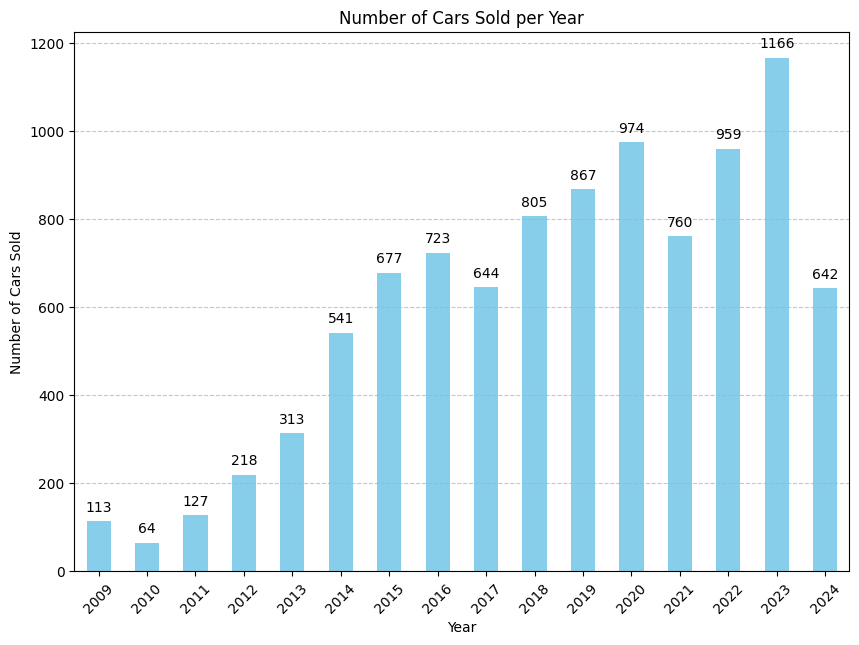

In [ ]:
cars_sold_per_year = Auto_Sales_Data.groupby('year').size()

# Plotting the results
plt.figure(figsize=(10, 7))
ax = cars_sold_per_year.plot(kind='bar', color='skyblue')

# Adding data points on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customizing the plot
plt.title('Number of Cars Sold per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Brand Distribution**

In [ ]:
#Total number of brands in the dataset
print('Different Car Brands: ',Auto_Sales_Data['brand'].unique())
print('Total Number of Car Brands:',Auto_Sales_Data['brand'].nunique())

Different Car Brands:  ['Dodge' 'Alfa Romeo' 'Audi' 'GAC' 'Land Rover' 'Hyundai' 'Volkswagen'
 'Volvo' 'Toyota' 'BMW' 'Nissan' 'Infiniti' 'Porsche' 'Rolls-Royce'
 'Mercedes-Benz' 'Ford' 'MINI' 'MG' 'Lexus' 'BAIC' 'Ferrari' 'Tesla'
 'Mazda' 'Honda' 'Bentley' 'Lamborghini' 'Jeep' 'McLaren' 'Chevrolet'
 'Jetour' 'Mercedes-Maybach' 'Cadillac' 'Daihatsu' 'SsangYong' 'Iveco'
 'Mitsubishi' 'Kia' 'Jaguar' 'Lincoln' 'Maserati' 'Mercedes-AMG'
 'Aston Martin' 'RAM' 'Daewoo' 'Haval' 'Genesis' 'Fiat' 'GMC' 'Great Wall'
 'Avatr' 'Opel' 'Peugeot' 'Suzuki' 'Hongqi' 'Subaru' 'Changan' 'Renault'
 'JAC' 'Chery' 'Maybach' 'TANK' 'Isuzu' 'Smart' 'Skoda' 'Lotus' 'Abarth'
 'UAZ' 'KTM' 'Rabdan' 'Chrysler' 'Bufori' 'Geely' 'INEOS' 'Bestune'
 'Fisker' 'BMW Alpina' 'Maxus' 'Bugatti' 'Acura' 'Pagani' 'Borgward'
 'Soueast' 'Mercury' 'Rivian' 'King Long' 'Zeekr' 'Hummer' 'Exeed'
 'International']
Total Number of Car Brands: 89


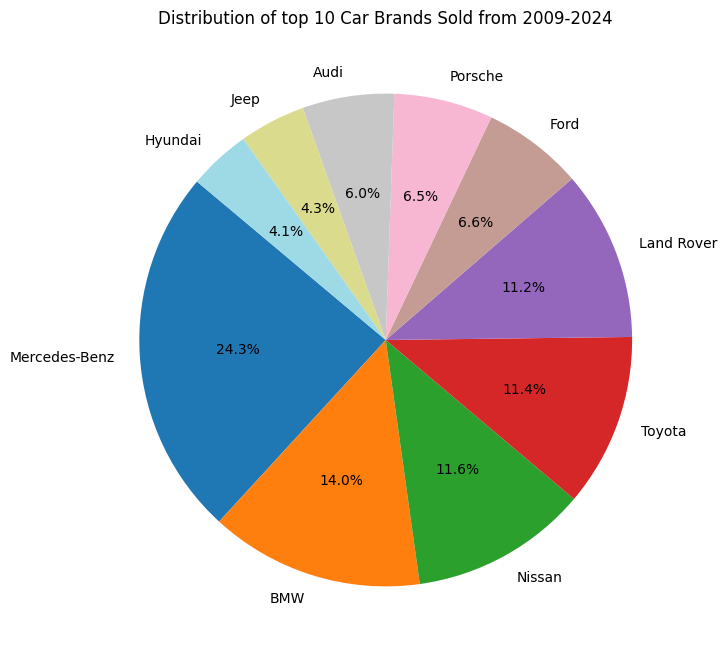

In [ ]:
#Printing the top 10 car brands sold
brand_vc_1 = Auto_Sales_Data['brand'].value_counts()
brand_top10_1 = brand_vc_1.head(10)
plt.figure(figsize=(8, 8))
brand_top10_1.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Distribution of top 10 Car Brands Sold from 2009-2024')
plt.ylabel('')
plt.show()

**Top 10 Models Sold**

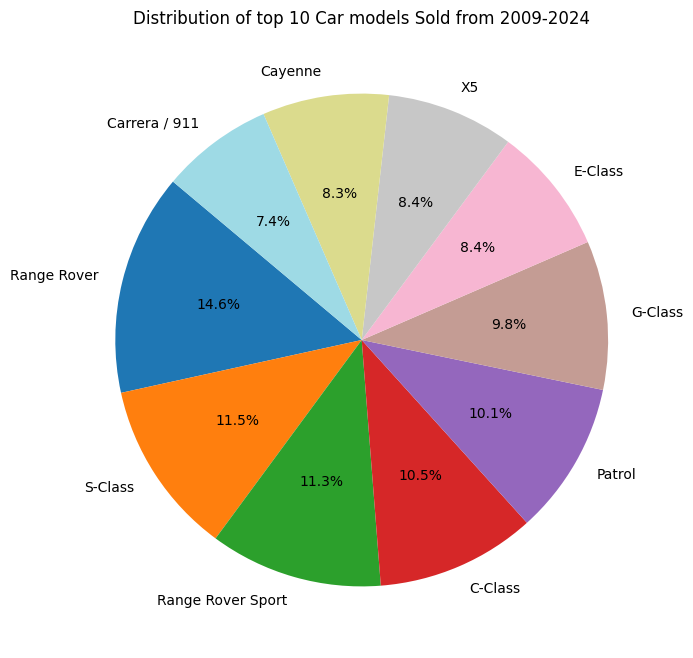

In [ ]:
#Printing the top 10 car Models sold
model_vc_1 = Auto_Sales_Data['model'].value_counts()
model_top10_1 = model_vc_1.head(10)
plt.figure(figsize=(8, 8))
model_top10_1.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Distribution of top 10 Car models Sold from 2009-2024')
plt.ylabel('')
plt.show()

**Cars Sold Vs Color**

<ipython-input-10-8a3ac3f3061a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='exterior_color', y='cars_sold', data=color_counts, palette='viridis')


Text(0, 0.5, 'Number of Cars Sold')

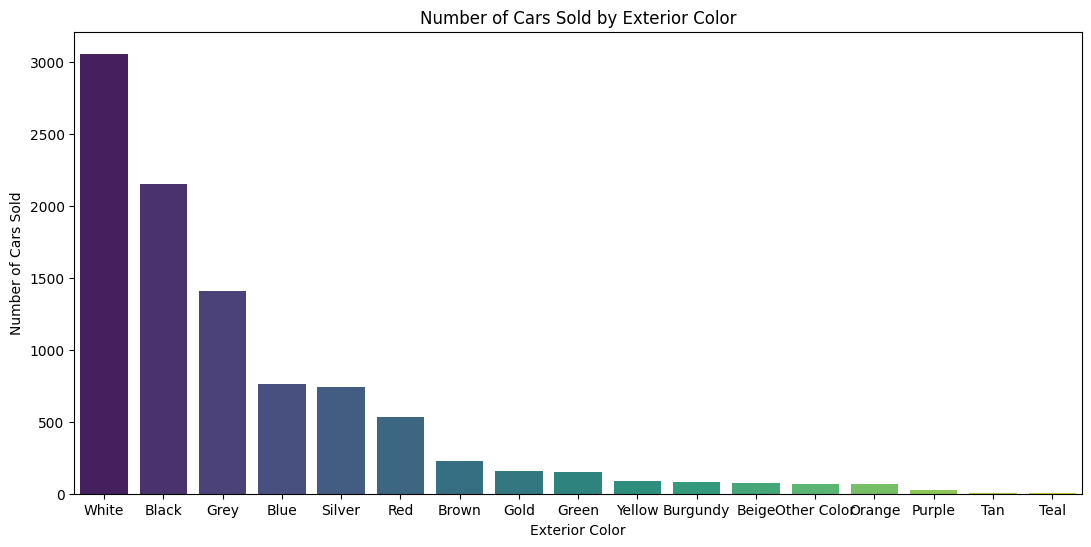

In [ ]:
#Plotting Cars Sold Vs Color
color_counts = Auto_Sales_Data['exterior_color'].value_counts().reset_index()
color_counts.columns = ['exterior_color', 'cars_sold']
plt.figure(figsize=(13, 6))
sns.barplot(x='exterior_color', y='cars_sold', data=color_counts, palette='viridis')

# Add titles and labels
plt.title('Number of Cars Sold by Exterior Color')
plt.xlabel('Exterior Color')
plt.ylabel('Number of Cars Sold')

> **From the above graph we can see that the number of white cars sold is the highest followed by Black, Grey, Blue, Silver, Red and soon**



**Distribution of Car Prices**

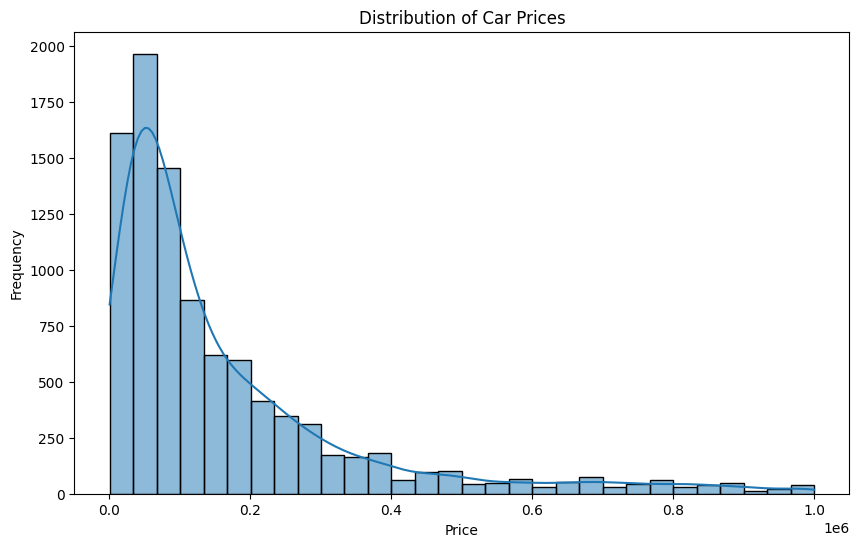

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(Auto_Sales_Data['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

> **From the above Histogram, it is observed that there are more number of cars sold in range of 33333 - 166666**



In [ ]:
#Check the range of price in the dataset
Auto_Sales_Data['price'].describe()

count      9593.000000
mean     164640.547587
std      187202.294090
min        1000.000000
25%       46900.000000
50%       95000.000000
75%      210000.000000
max      999900.000000
Name: price, dtype: float64

> **From the above data we can see that maximum and minimum value of price has huge difference - min: 1000 & max: 999900**

There might be some outliers in this data which will be treated later below

**Distribution of Body Type:**

<ipython-input-32-406182a890a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='body_type', y='cars_sold', data=body_type_counts, palette='viridis')


Text(0, 0.5, 'Number of Cars Sold')

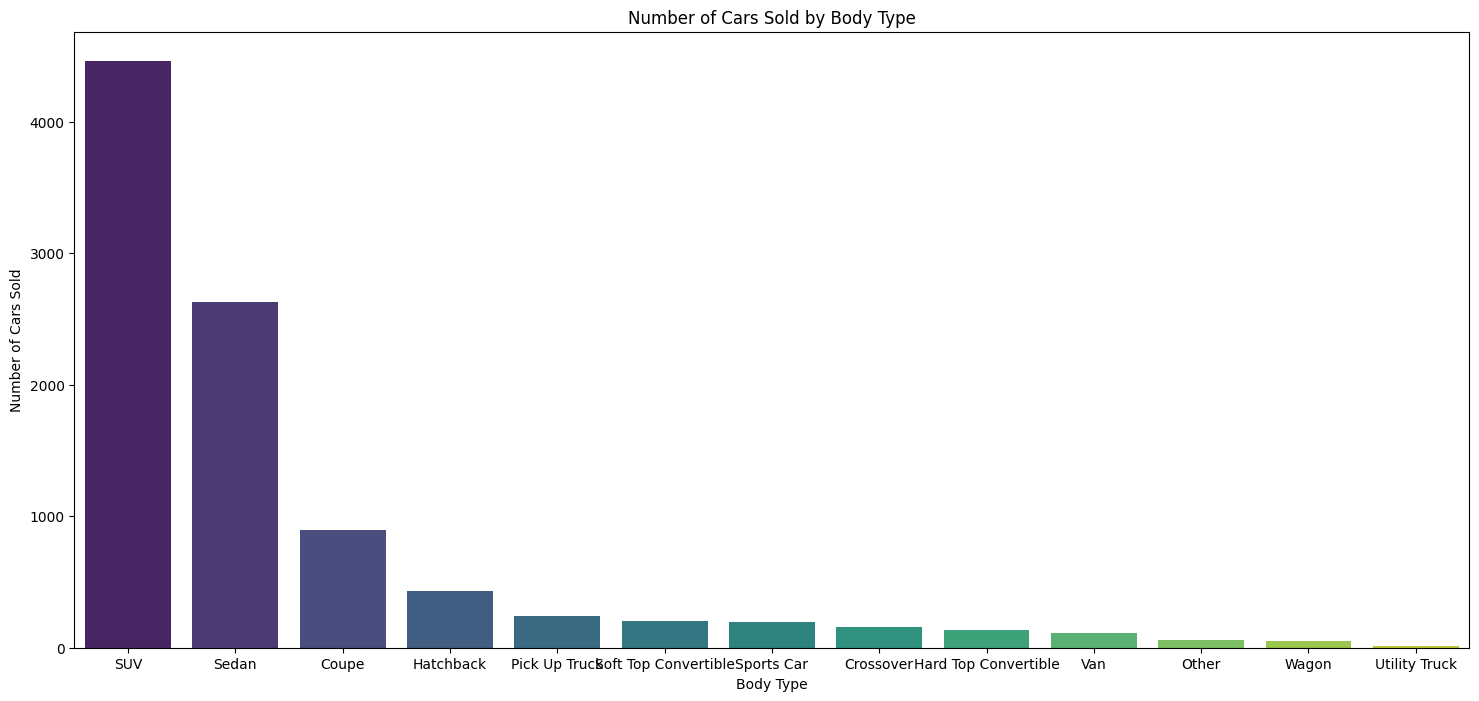

In [ ]:
#Plotting No of Vehicles Sold Vs Body Type
body_type_counts = Auto_Sales_Data['body_type'].value_counts().reset_index()
body_type_counts.columns = ['body_type', 'cars_sold']
plt.figure(figsize=(18, 8))
sns.barplot(x='body_type', y='cars_sold', data=body_type_counts, palette='viridis')
# plt.pie(body_type_counts['cars_sold'], labels=body_type_counts['body_type'], autopct='%1.1f%%', startangle=140)
plt.title('Number of Cars Sold by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Number of Cars Sold')



> **It is observed from the above graph that SUV Vehicles are sold more than others, followed by Sedan, Coupe & Hatch Back**



**Scatter Plot on Kilometers Vs Price**

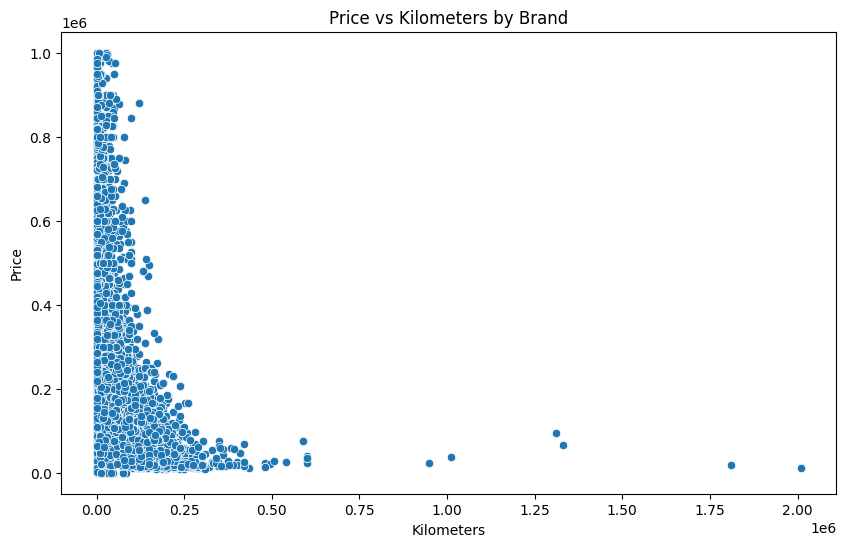

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometers', y='price', data=Auto_Sales_Data)
plt.title('Price vs Kilometers by Brand')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.show()



> **There are more number of cars sold in the price range of 0 - 0.2 * 10e6 with a range of mileage of 0 - 0.25 * 10e6**



**Geographical Plots**

In [ ]:
print('Unique Values in Lat: ',Auto_Sales_Data['latitude'].unique())

Unique Values in Lat:  [25.266173 25.2754161 25.0786415 25.0559446 25.167737 25.3061521
 25.26927935 25.1524105 25.1177213 25.2069604 25.17546645 25.0690625
 25.1180879 25.18668425 25.21762295 25.0778021 25.116240150000003
 25.17901365 25.2142937 25.2675454 25.058063 25.0679998 25.05995825
 25.189933000000003 25.2806161 25.23559045 25.2557676 25.096326 25.1939625
 25.2913041 25.3112167 25.21449535 24.985235 25.177447 25.2450842
 25.16875235 25.3140619 25.343567 25.2531578 24.9775987 25.12689085
 25.15584035 25.156562 'Unknown' 25.0617416 25.0982842 25.3005332
 25.269769 25.2997389 25.2224534 25.1322737 25.3169625 25.0204108
 25.1678215 24.3659678 24.373808 25.26387 25.18942655 25.219343 24.3866584
 25.433717 25.01302625 25.15598515 25.197978 25.2211708 25.2343386
 25.20542585 24.983077 25.1247031 25.3256445 25.2222708 25.09872095
 25.222025 24.3686865 25.1738662 25.04875135 25.070213950000003
 25.10019025 25.03827075 25.153617 25.36335235 25.2741549 25.082916
 25.0267099 25.0627549 25.

In [ ]:
# Convert 'Latitude' and 'Longitude' to strings (in case they are not)
Auto_Sales_Data['latitude'] = Auto_Sales_Data['latitude'].astype(str)
Auto_Sales_Data['longitude'] = Auto_Sales_Data['longitude'].astype(str)

# Filter out rows where 'Latitude' or 'Longitude' is 'unique'
df_filtered = Auto_Sales_Data[(Auto_Sales_Data['latitude'] != 'unique') & (Auto_Sales_Data['longitude'] != 'unique')]

def is_valid_coordinate(coord):
    try:
        value = float(coord)
        return True
    except ValueError:
        return False

df_filtered = df_filtered[df_filtered['latitude'].apply(is_valid_coordinate) & df_filtered['longitude'].apply(is_valid_coordinate)]

# Convert the cleaned 'latitude' and 'longitude' columns back to float
df_filtered['latitude'] = df_filtered['latitude'].astype(float)
df_filtered['longitude'] = df_filtered['longitude'].astype(float)



**Hover over UAE in the below map to check what kind of vehciles are sold with price**

In [ ]:
import plotly.express as px

# Use the filtered DataFrame
fig = px.scatter_mapbox(df_filtered, lat='latitude', lon='longitude', hover_name='model', hover_data=['price'],
                        color_discrete_sequence=['skyblue'], zoom=3, height=600)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Geographical Distribution of Car Sales')
fig.show()

**Checking for correlation between numerical features**

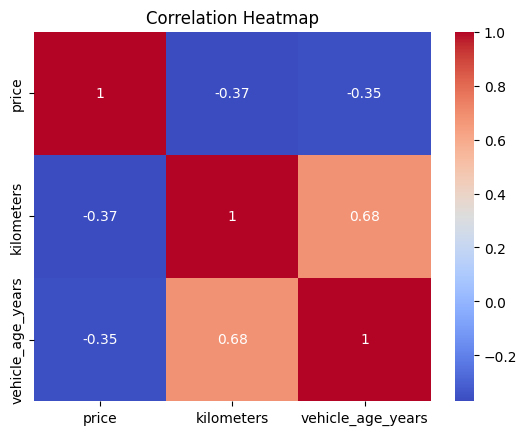

In [ ]:
#Correlation Map on Numerical Features
sns.heatmap(Auto_Sales_Data[['price', 'kilometers', 'vehicle_age_years']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

> From the above correlation heat map we can see that price vs year is showing 35% relation, and kilms vs price says -37%.


It means there are a significant amount of outliers and noise in the data which can be cleaned up in the next section Outlier Analysis



### **Outlier Analysis**

**Outliers in Price Entries**

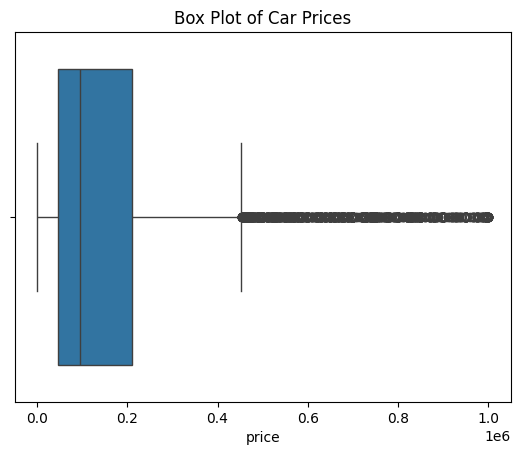

In [ ]:
#Understanding outliers in Price entries
sns.boxplot(x=Auto_Sales_Data['price'])
plt.title('Box Plot of Car Prices')
plt.show()

In [ ]:
# 3. Identify Outliers Using IQR
Q1 = Auto_Sales_Data['price'].quantile(0.25)
Q3 = Auto_Sales_Data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Auto_Sales_Data[(Auto_Sales_Data['price'] < lower_bound) | (Auto_Sales_Data['price'] > upper_bound)]

# Print outliers
print("Outliers:")
outliers

Outliers:


,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
25,995000,Land Rover,Range Rover,14000,2023,1,GCC Specs,5,SUV,Petrol,...,Beige,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
52,975000,Ferrari,Roma,2949,2023,1,GCC Specs,2,Coupe,Petrol,...,Brown,No,"Jumeirah, Dubai, UAE",UAE,Dubai,Jumeirah,Unknown,25.2069604,55.2474974,Dealer
75,949000,Ferrari,Roma,13870,2022,2,European Specs,2,Coupe,Petrol,...,Black,No,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
82,769000,Porsche,Carrera / 911,0,2024,0,GCC Specs,2,Soft Top Convertible,Petrol,...,Brown,Yes,"Al Quoz Industrial Area 1, Al Quoz Industrial ...",UAE,Dubai,Al Quoz,Al Quoz Industrial Area,25.1524105,55.2340999,Dealer
85,985000,McLaren,Artura,0,2024,0,GCC Specs,2,Sports Car,Petrol,...,Black,Yes,"Al Quoz Industrial Area 1, Al Quoz Industrial ...",UAE,Dubai,Al Quoz,Al Quoz Industrial Area,25.1524105,55.2340999,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,455000,BMW,X5,500,2024,0,GCC Specs,4,SUV,Petrol,...,Brown,Yes,"Al Bateen, Abu Dhabi, UAE",UAE,Abu Dhabi,Al Bateen,Unknown,24.45138385,54.33796581892305,Owner
9891,475000,BMW,7-Series,500,2024,0,GCC Specs,4,Sedan,Petrol,...,Unknown,Yes,"Al Bateen, Abu Dhabi, UAE",UAE,Abu Dhabi,Al Bateen,Unknown,24.45138385,54.33796581892305,Owner
9897,660000,BMW,7-Series,500,2024,0,GCC Specs,4,Sedan,Petrol,...,Brown,Yes,"Al Bateen, Abu Dhabi, UAE",UAE,Abu Dhabi,Al Bateen,Unknown,24.45138385,54.33796581892305,Owner
9906,475000,BMW,7-Series,500,2024,0,GCC Specs,4,Sedan,Petrol,...,Brown,Yes,"Al Bateen, Abu Dhabi, UAE",UAE,Abu Dhabi,Al Bateen,Unknown,24.45138385,54.33796581892305,Owner




> **There are 780 Outliers out of 9593  in the Price Column of this dataset**


In [ ]:
#Check the range of price in the dataset
Auto_Sales_Data['price'].describe()

count      9593.000000
mean     164640.547587
std      187202.294090
min        1000.000000
25%       46900.000000
50%       95000.000000
75%      210000.000000
max      999900.000000
Name: price, dtype: float64

We can see from the above description that minimum value is 1000 and maximum value is 999900 which is a huge difference.

Check for data in range of 1000 - 5000 price and validate

In [ ]:
#Loading data from price range of 1000 - 5000
Auto_Sales_Data_Low_Price = Auto_Sales_Data[Auto_Sales_Data['price'] <= 5000]
Auto_Sales_Data_Low_Price

,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
26,1050,Land Rover,Range Rover,100,2023,1,Other,5,SUV,Petrol,...,Black,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
27,1050,Land Rover,Range Rover,100,2023,1,Other,5,SUV,Petrol,...,Tan,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
28,1290,Land Rover,Range Rover,100,2023,1,Other,5,SUV,Petrol,...,Tan,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
29,1050,Land Rover,Range Rover,100,2024,0,Other,5,SUV,Petrol,...,White,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
30,1450,Porsche,Carrera / 911,8000,2018,6,Other,2,Coupe,Petrol,...,Black,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,1850,Ferrari,296 GTS,200,2024,0,GCC Specs,2,Hard Top Convertible,Petrol,...,Black,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
9761,1499,Ferrari,SF90 Stradale,14000,2022,2,Other,2,Coupe,Petrol,...,Black,Does not apply,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
9772,2850,Ferrari,SF90 Spider,300,2024,0,GCC Specs,2,Soft Top Convertible,Petrol,...,Black,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
9774,1340,Ferrari,812 Superfast,14000,2019,5,GCC Specs,2,Coupe,Petrol,...,Unknown,Yes,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer


It is observed from above data that there about 497 data points with price of the car being less than 5000 and the brands are Ferrari, Lamborghini which are relatively new models from approx 2019 - 2024 which cannot be the case.

All these data points are outliers or noise which cannot be true.

In [ ]:
Auto_Sales_Data_Low_Price['brand'].unique()

array(['Land Rover', 'Porsche', 'Rolls-Royce', 'Bentley', 'Mercedes-Benz',
       'Lamborghini', 'Ferrari', 'McLaren', 'Mercedes-Maybach', 'Ford',
       'Aston Martin', 'Mercedes-AMG', 'Maserati'], dtype=object)

Above brands are all expensive brands which for sure does not cost below 5000.

However there is a brand Ford vehicles which may fall in this range.

Check for Ford Vehicles.

In [ ]:
Auto_Sales_Data_Low_Price[Auto_Sales_Data_Low_Price['brand'] == 'Ford']

,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
696,4499,Ford,GT,0,2022,2,European Specs,2,Coupe,Petrol,...,Black,No,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.16875235,55.25629740373645,Dealer
5506,4750,Ford,GT,60,2019,5,GCC Specs,2,Coupe,Petrol,...,Black,No,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.16875235,55.25629740373645,Dealer


Even the above 2 data entry with Ford GT which are relatively new does not cost this less so can be removed from the dataset

In [ ]:
Auto_Sales_Data_Low_Price['year'].unique()

array([2023, 2024, 2018, 2022, 2020, 2019, 2021, 2011, 2015, 2013, 2014,
       2009, 2016, 2017, 2012])

In [ ]:
Auto_Sales_Data_Low_Price[(Auto_Sales_Data_Low_Price['year'] >= 2009) & (Auto_Sales_Data_Low_Price['ybear'] <= 2016)]

,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
694,4999,Ferrari,599 GTO,1372,2011,13,GCC Specs,2,Coupe,Petrol,...,Yellow,No,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.16875235,55.25629740373645,Dealer
699,4499,McLaren,P1,3288,2015,9,GCC Specs,2,Coupe,Petrol,...,Black,No,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.16875235,55.25629740373645,Dealer
1533,1999,Rolls-Royce,Phantom,9260,2013,11,European Specs,2,Coupe,Petrol,...,Tan,No,"Al Safa 1, Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Al Safa 1,25.17546645,55.23847392629866,Dealer
1536,1749,Rolls-Royce,Phantom,24603,2014,10,GCC Specs,2,Coupe,Petrol,...,Unknown,No,"Al Safa, Dubai, UAE",UAE,Dubai,Al Safa,Unknown,25.167737,55.231018,Dealer
2642,1595,Ferrari,F430,23402,2009,15,GCC Specs,2,SUV,Petrol,...,Black,Yes,"Al Quoz Industrial Area 1, Al Quoz Industrial ...",UAE,Dubai,Al Quoz,Al Quoz Industrial Area,25.1524105,55.2340999,Dealership/Certified Pre-Owned
3144,1699,Ferrari,458 Speciale,23447,2015,9,GCC Specs,2,Coupe,Petrol,...,Unknown,No,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.16875235,55.25629740373645,Dealer
3197,3300,Mercedes-Benz,SLS,7245,2014,10,GCC Specs,2,Coupe,Petrol,...,Black,No,"Dubai Marina, Dubai, UAE",UAE,Dubai,Dubai Marina,Unknown,25.0786415,55.1352524,Dealer
5191,1045,Rolls-Royce,Dawn,23336,2016,8,European Specs,2,Soft Top Convertible,Petrol,...,White,No,"Sheikh Zayed Road, Dubai, UAE",UAE,Dubai,Sheikh Zayed Road,Unknown,25.21762295,55.2782830925684,Dealer
5628,2800,Mercedes-Benz,SLS,14981,2013,11,Japanese Specs,2,Coupe,Petrol,...,Black,No,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.16875235,55.25629740373645,Dealer
6438,2599,Ferrari,F430 Spider,0,2009,15,European Specs,2,Hard Top Convertible,Petrol,...,Black,No,"Al Quoz 1, Al Quoz, Dubai, UAE",UAE,Dubai,Al Quoz,Al Quoz 1,25.16875235,55.25629740373645,Dealer




> Even the older vehicles which are upto 15 years old vehicles are all exotic vehicles with an impossible price point. These data entries are either wrong entries or fake ones and therefore can be ignored while conducting analysis.



In [ ]:
price_threshold = 5000

# Filter the DataFrame to remove entries where the price is below the threshold
Auto_Sales_Data = Auto_Sales_Data[Auto_Sales_Data['price'] >= price_threshold]

# Display the filtered DataFrame
Auto_Sales_Data.head()

,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
0,129900,Dodge,Ram,47566,2021,3,GCC Specs,4,Pick Up Truck,Petrol,...,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,8914,2020,4,GCC Specs,5,SUV,Petrol,...,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Deira,Abu Hail,25.275416,55.34645,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,72205,2019,5,GCC Specs,5,SUV,Petrol,...,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,49193,2021,3,GCC Specs,4,Hatchback,Petrol,...,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,30,2024,0,GCC Specs,5,SUV,Petrol,...,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned


In [ ]:
#Loading data from price range of 1000 - 5000
Auto_Sales_Data_Low_Price = Auto_Sales_Data[Auto_Sales_Data['price'] <= 5000]
Auto_Sales_Data_Low_Price

,price,brand,model,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,fuel_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type


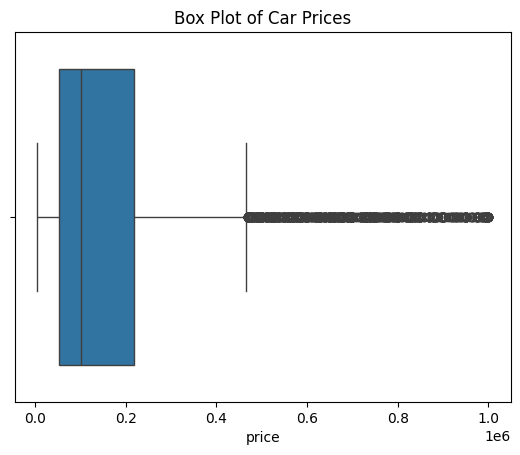

In [ ]:
#Understanding outliers in Price entries
sns.boxplot(x=Auto_Sales_Data['price'])
plt.title('Box Plot of Car Prices')
plt.show()

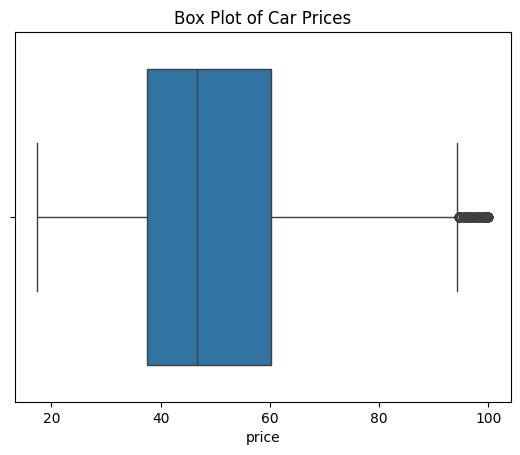

In [ ]:
#Using cube root of the data to check whether the data is more distributed equally
#Understanding outliers in Price entries
sns.boxplot(x=np.cbrt(Auto_Sales_Data['price']))
plt.title('Box Plot of Car Prices')
plt.show()



> If we use cubroot of the data we can see that a lot of outliers has been normalised without removing the data



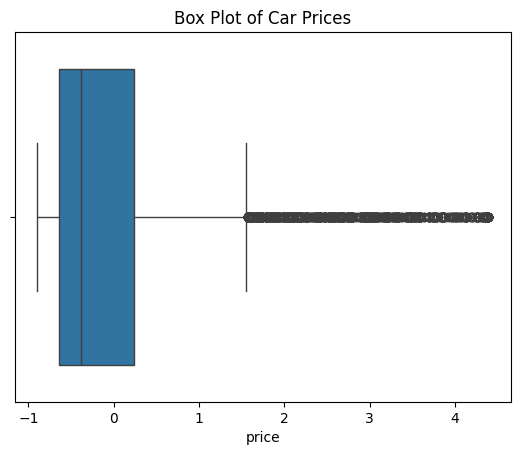

In [ ]:
#Using cube root of the data to check whether the data is more distributed equally
#Understanding outliers in Price entries
sns.boxplot(x=zscore(Auto_Sales_Data['price']))
plt.title('Box Plot of Car Prices')
plt.show()

ValueError: Per-column arrays must each be 1-dimensional

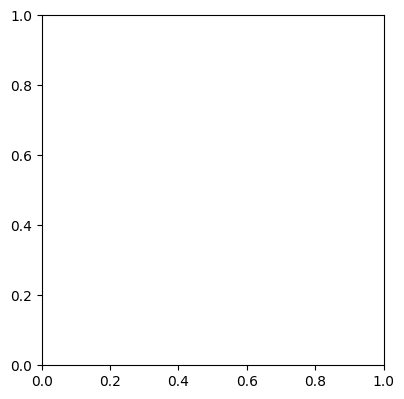

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer


# Normalization functions
def apply_zscore(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data.values.reshape(-1, 1))

def apply_robust_scaler(data):
    scaler = RobustScaler()
    return scaler.fit_transform(data.values.reshape(-1, 1))

def apply_log_transform(data):
    return np.log1p(data)

def apply_boxcox_transform(data):
    pt = PowerTransformer(method='box-cox')
    return pt.fit_transform(data.values.reshape(-1, 1))

def apply_yeojohnson_transform(data):
    pt = PowerTransformer(method='yeo-johnson')
    return pt.fit_transform(data.values.reshape(-1, 1))

def apply_quantile_transform(data):
    qt = QuantileTransformer(output_distribution='normal')
    return qt.fit_transform(data.values.reshape(-1, 1))

# Applying transformations
transformations = {
    'Z-Score': apply_zscore(Auto_Sales_Data['price']),
    'Robust Scaler': apply_robust_scaler(Auto_Sales_Data['price']),
    'Log Transform': apply_log_transform(Auto_Sales_Data['price']),
    'Box-Cox Transform': apply_boxcox_transform(Auto_Sales_Data['price']),
    'Yeo-Johnson Transform': apply_yeojohnson_transform(Auto_Sales_Data['price']),
    'Quantile Transform': apply_quantile_transform(Auto_Sales_Data['price'])
}

# Plotting boxplots for each transformation
plt.figure(figsize=(15, 10))
for i, (name, transformed_data) in enumerate(transformations.items(), 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=transformed_data)
    plt.title(f'Box Plot of Car Prices ({name})')
plt.tight_layout()
plt.show()

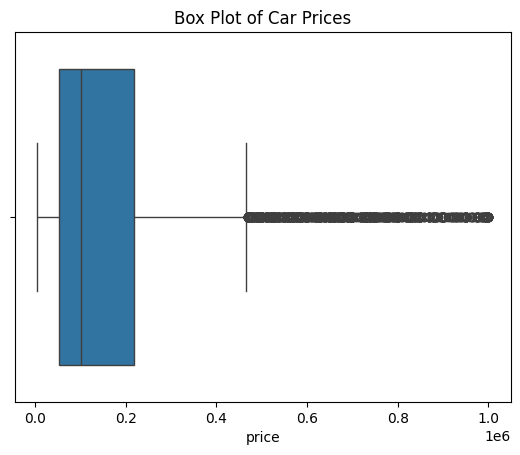

In [ ]:
Auto_Sales_Data_test = Auto_Sales_Data.copy()
scaler = StandardScaler()
scaler.fit_transform(Auto_Sales_Data_test['price'].values.reshape(-1, 1))
sns.boxplot(x=Auto_Sales_Data_test['price'])
plt.title('Box Plot of Car Prices')
plt.show()